## Mantle evolution curve

We first need the mantle evolution curve to draw the evolution of Osimium. The curve is obtained from Allègre and Luck (1980): **Ignore this curve**

$$(^{187}Os/^{186}Os) = (^{187}Os/^{186}Os)_0 + (^{187}Re/^{186}Os)_{mantle}(e^{\lambda t}-1)$$

The coefficients are as follow:

* $(^{187}Os/^{186}Os)_0 = 0.805$ (the intercept of the curve)

* $(^{187}Re/^{186}Os)_{mantle} = 3.15$ (the slope of the curve)

* $\lambda = 1.61e-11 yr^{-1}$

Another curve is for $^{187}Os/^{188}Os$ is as follows (from Walker et. al., 1989): **We used this curve**

$$(^{187}Os/^{188}Os) = (^{187}Os/^{186}Os)_0 + (^{187}Re/^{188}Os)_{mantle}(e^{\lambda t}-1)$$

The coefficients are as follow:

* $(^{187}Os/^{188}Os)_0 = 0.1296$ (the intercept of the curve)

* $(^{187}Re/^{188}Os)_{mantle} = 0.4345$ (the slope of the curve)

* $\lambda = 1.61e-11 yr^{-1}$


Allègre, C.J. and Luck, J.M., 1980. Osmium isotopes as petrogenetic and geological tracers. Earth and Planetary Science Letters, 48(1), pp.148-154.

Walker, R.J. and Morgan, J.W., 1989. Rhenium-osmium isotope systematics of carbonaceous chondrites. Science, 243(4890), pp.519-522.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [108]:
def mantle_curve(t,system="DM"):
    lda = 1.61e-11
    if system == "DM":
        Os187_Os188o = 0.1281
        Re187_Os188m = 0.421
        Os187_Os188 = Os187_Os188o - Re187_Os188m*(np.exp(lda*t*10**6)-1)
    elif system == "CHUR":
        Os187_Os188o = 0.127
        Re187_Os188m = 0.3935
        Os187_Os188 = Os187_Os188o - Re187_Os188m*(np.exp(lda*t*10**6)-1)
    return Os187_Os188 



In [109]:
def I0(I,R,t,lda):
    I0 = I - R*(np.exp(lda*t*10**6)-1)
    return I0

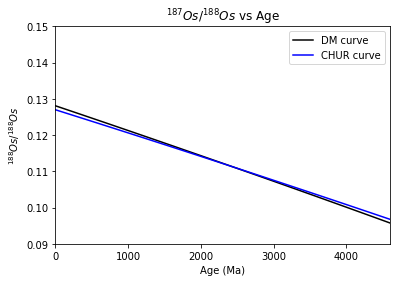

In [110]:
t = np.arange(0,4601,100)

# Os187_Os186o = 0.805
# Re187_Os186m = 3.15
# lda = 1.61e-11

# Os187_Os186 = Os187_Os186o + Re187_Os186m*(np.exp(lda*t*10**6)-1)
# plt.figure(figsize=[12,5])
# plt.subplot(121)
# plt.plot(4600-t,Os187_Os186,"k-")
# plt.xlim(0,4600)
# plt.ylim(0.75,1.15)
# plt.xlabel("Age (Ma)")
# plt.ylabel(r"$^{187}Os/^{186}Os$")
# plt.title(r"$^{187}Os/^{186}Os$ vs Age")

Os187_Os188o = 0.1296
Re187_Os188m = 0.4345
lda = 1.61e-11

#plt.subplot(122)
#Os187_Os188 = Os187_Os188o - Re187_Os188m*(np.exp(lda*t*10**6)-1)
plt.plot(t,mantle_curve(t,system="DM"),"k-",label="DM curve")
plt.plot(t,mantle_curve(t,system="CHUR"),"b-", label="CHUR curve")
plt.xlim(0,4600)
plt.ylim(0.09,0.15)
plt.xlabel("Age (Ma)")
plt.ylabel(r"$^{188}Os/^{188}Os$")
plt.title(r"$^{187}Os/^{188}Os$ vs Age")
plt.legend()
plt.show()

In [111]:
df = pd.read_csv("re_os_olondo.csv")
df

,Sample No.,Rock type,187Re/188Os,2se,187Os/188Os,2se.1,2s%,_Os p,187Os/188Osi,_Osi,TRD (Ma),2se.2,TMA (Ma),2se.3
0,OL1633,Ultramafic,0.256200,0.000200,0.12251,0.00010,0.08,-4.4,0.10938,2.9,2611,48,2002,37
1,OL1637,Ultramafic,0.018106,0.000004,0.10744,0.00002,0.02,-16.1,0.10651,0.2,3002,3,3002,3
2,OL1638,Ultramafic,0.012980,0.000010,0.10704,0.00008,0.08,-16.4,0.10638,0.1,3020,12,3020,12
3,OL1639,Ultramafic,0.007218,0.000005,0.10687,0.00007,0.07,-16.6,0.10650,0.2,3003,10,3003,10
4,OL1639-1,Ultramafic,0.006878,0.000001,0.10715,0.00002,0.01,-16.4,0.10680,0.5,2962,2,2962,2
5,OL1640,Ultramafic,0.004814,0.000001,0.10707,0.00003,0.03,-16.4,0.10682,0.5,2960,5,2959,5
6,OL1668,Ultramafic,0.302000,0.000100,0.11924,0.00004,0.04,-6.9,0.10377,-2.4,3373,17,4309,22
7,OL1669,Ultramafic,0.239900,0.000100,0.11600,0.00003,0.03,-9.4,0.10371,-2.4,3380,10,3880,11


In [112]:
# plt.figure(figsize=[5,5])
# plt.plot(t,Os187_Os188,"k-")
# plt.scatter(df["TRD (Ma)"],df["187Os/188Os"])
# plt.xlim(0,4600)
# plt.ylim(0.09,0.15)
# plt.xlabel("Age (Ma)")
# plt.ylabel(r"$^{188}Os/^{188}Os$")
# plt.title(r"$^{187}Os/^{186}Os$ vs Age (KL calculation)")
# plt.show()

### We examined the $\gamma$ and $T_{RD}$ calculation

The model age of a sample is the time at which its Os isotopic composition is the same as that of the mantle, i.e. $(^{187}Os/^{188}Os)_{sample} = (^{187}Os/^{188}Os)_{Mantle}$

#### $\gamma$

#### $T_{RD}$

$$T_{RD} = \frac{1}{\lambda} \left[ln\left[\frac{(^{187}Os/^{188}Os)_{Mantle}-^{187}Os/^{188}Os)_{Sample}}{(^{187}Re/^{188}Os)_{Mantle}} \right]+1\right]$$

The coefficients are as follow:

* $(^{187}Os/^{188}Os)_{DM} = 0.1296$

* $(^{187}Re/^{188}Os)_{DM} = 0.4345$

If the model is compare with CHUR:

* $(^{187}Os/^{188}Os)_{CHUR} = 0.127$

* $(^{187}Re/^{188}Os)_{CHUR} = 0.3935$


In [122]:
Os187_Os188o = 0.1281
Re187_Os188m = 0.421
lda = 1.666e-11
df["TRD_DM"] = 1/lda*(np.log((Os187_Os188o-df["187Os/188Os"].values)/Re187_Os188m+1))/10**6
df["TRD_DM"] = df["TRD_DM"].apply(round)
df["TMA_DM"] = 1/lda*(np.log((Os187_Os188o-df["187Os/188Os"].values)/(Re187_Os188m - df["187Re/188Os"].values)+1))/10**6
df["TMA_DM"] = df["TMA_DM"].apply(round)

In [123]:
Os187_Os188chur = 0.127
Re187_Os188chur = 0.3935
df["TRD_CHUR"] = 1/lda*(np.log((Os187_Os188chur-df["187Os/188Os"].values)/Re187_Os188chur+1))/10**6
df["TRD_CHUR"] = df["TRD_CHUR"].apply(round)
df["TMA_CHUR"] = 1/lda*(np.log((Os187_Os188chur-df["187Os/188Os"].values)/(Re187_Os188chur - df["187Re/188Os"].values)+1))/10**6
df["TMA_CHUR"] = df["TMA_CHUR"].apply(round)

In [124]:
# plt.figure(figsize=[5,5])
# plt.plot(t,Os187_Os188,"k-")
# plt.scatter(df["TRD_recal"],df["187Os/188Os"])
# for i in range(0,len(df)):
#     plt.plot([0,df["TRD_recal"][i]],[df["187Os/188Os"][i],df["187Os/188Os"][i]],"k--",linewidth=0.5)
# plt.xlim(0,4600)
# plt.ylim(0.09,0.15)
# plt.xlabel(r"$T_{RD} (Ma)$")
# plt.ylabel(r"$^{188}Os/^{188}Os$")
# plt.title(r"$^{187}Os/^{186}Os$ vs Age (Re calculation)")
# plt.show()

In [125]:
df["meta.grade"] = ["cum.","cum.","dun.","dun.","dun.","dun.","sep.","sep."]
df

,Sample No.,Rock type,187Re/188Os,2se,187Os/188Os,2se.1,2s%,_Os p,187Os/188Osi,_Osi,TRD (Ma),2se.2,TMA (Ma),2se.3,TRD_DM,TMA_DM,TRD_CHUR,TMA_CHUR,meta.grade,187Os/188Osi_CHUR
0,OL1633,Ultramafic,0.256200,0.000200,0.12251,0.00010,0.08,-4.4,0.10938,2.9,2611,48,2002,37,792,2002,681,1931,cum.,0.11413
1,OL1637,Ultramafic,0.018106,0.000004,0.10744,0.00002,0.02,-16.1,0.10651,0.2,3002,3,3002,3,2876,3002,2912,3049,cum.,0.10650
2,OL1638,Ultramafic,0.012980,0.000010,0.10704,0.00008,0.08,-16.4,0.10638,0.1,3020,12,3020,12,2930,3021,2970,3069,dun.,0.10636
3,OL1639,Ultramafic,0.007218,0.000005,0.10687,0.00007,0.07,-16.6,0.10650,0.2,3003,10,3003,10,2953,3003,2995,3049,dun.,0.10649
4,OL1639-1,Ultramafic,0.006878,0.000001,0.10715,0.00002,0.01,-16.4,0.10680,0.5,2962,2,2962,2,2915,2962,2954,3005,dun.,0.10680
5,OL1640,Ultramafic,0.004814,0.000001,0.10707,0.00003,0.03,-16.4,0.10682,0.5,2960,5,2959,5,2926,2959,2966,3001,dun.,0.10682
6,OL1668,Ultramafic,0.302000,0.000100,0.11924,0.00004,0.04,-6.9,0.10377,-2.4,3373,17,4309,22,1250,4310,1172,4886,sep.,0.09363
7,OL1669,Ultramafic,0.239900,0.000100,0.11600,0.00003,0.03,-9.4,0.10371,-2.4,3380,10,3880,11,1701,3882,1655,4152,sep.,0.09882


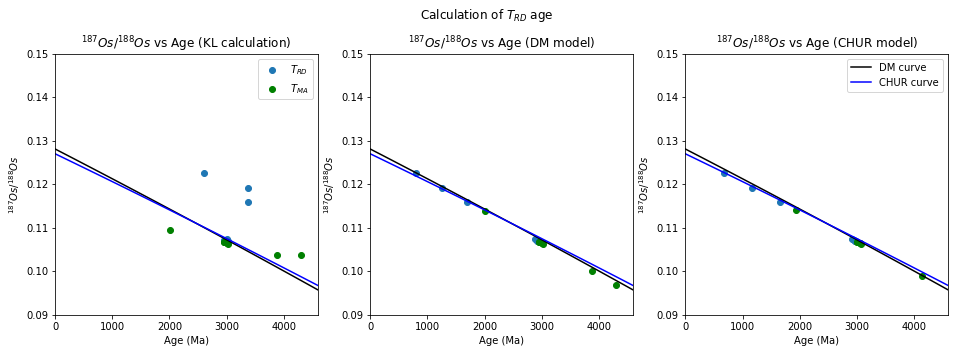

In [126]:
plt.figure(figsize=[16,5])

plt.subplot(131)
plt.plot(t,mantle_curve(t,system="DM"),"k-")
plt.plot(t,mantle_curve(t,system="CHUR"),"b-")
plt.scatter(df["TRD (Ma)"],df["187Os/188Os"],label="$T_{RD}$")
plt.scatter(df["TMA (Ma)"],df["187Os/188Osi"],c="g",label="$T_{MA}$")
plt.xlim(0,4600)
plt.ylim(0.09,0.15)
plt.xlabel("Age (Ma)")
plt.ylabel(r"$^{187}Os/^{188}Os$")
plt.title(r"$^{187}Os/^{188}Os$ vs Age (KL calculation)")
plt.legend()

plt.subplot(132)
plt.plot(t,mantle_curve(t,system="DM"),"k-",label="DM curve")
plt.plot(t,mantle_curve(t,system="CHUR"),"b-", label="CHUR curve")
plt.scatter(df["TRD_DM"],df["187Os/188Os"])
i0_DM = I0(df["187Os/188Os"],df["187Re/188Os"],df["TMA_DM"],lda)
plt.scatter(df["TMA_DM"],i0_DM,c="g")
# for i in range(0,len(df)):
#     plt.plot([0,df["TRD_DM"][i]],[df["187Os/188Os"][i],df["187Os/188Os"][i]],"k--",linewidth=0.5)
#     plt.plot([0,df["TMA_DM"][i]],[df["187Os/188Os"][i],i0_DM[i]],"b--")
plt.xlim(0,4600)
plt.ylim(0.09,0.15)
plt.xlabel("Age (Ma)")
plt.ylabel(r"$^{187}Os/^{188}Os$")
plt.title(r"$^{187}Os/^{188}Os$ vs Age (DM model)")

plt.subplot(133)
plt.plot(t,mantle_curve(t,system="DM"),"k-",label="DM curve")
plt.plot(t,mantle_curve(t,system="CHUR"),"b-", label="CHUR curve")
plt.scatter(df["TRD_CHUR"],df["187Os/188Os"])
i0_CHUR = I0(df["187Os/188Os"],df["187Re/188Os"],df["TMA_CHUR"],lda)
plt.scatter(df["TMA_CHUR"],i0_CHUR,c="g")
# for i in range(0,len(df)):
#     plt.plot([0,df["TRD_CHUR"][i]],[df["187Os/188Os"][i],df["187Os/188Os"][i]],"k--",linewidth=0.5)
#     plt.plot([0,df["TMA_CHUR"][i]],[df["187Os/188Os"][i],i0_CHUR[i]],"b--")
plt.xlim(0,4600)
plt.ylim(0.09,0.15)
plt.xlabel("Age (Ma)")
plt.ylabel(r"$^{187}Os/^{188}Os$")
plt.title(r"$^{187}Os/^{188}Os$ vs Age (CHUR model)")
plt.legend()

plt.suptitle("Calculation of $T_{RD}$ age ")
plt.subplots_adjust(top=0.85)
plt.show()

In [127]:
# plt.figure(figsize=[16,5])

# select = [0,1]
# plt.subplot(121)
# plt.plot(t,mantle_curve(t,system="DM"),"k-",label="DM curve")
# plt.plot(t,mantle_curve(t,system="CHUR"),"b-", label="CHUR curve")
# plt.scatter(df["TRD_DM"][select],df["187Os/188Os"][select])
# i0_DM = I0(df["187Os/188Os"],df["187Re/188Os"],df["TMA_DM"],lda)
# plt.scatter(df["TMA_DM"][select],i0_DM[select],c="g")
# for i in select:
#     plt.plot([0,df["TRD_DM"][i]],[df["187Os/188Os"][i],df["187Os/188Os"][i]],"k--",linewidth=0.5)
#     plt.plot([0,df["TMA_DM"][i]],[df["187Os/188Os"][i],i0_DM[i]],"k--",linewidth=0.5)
# plt.xlim(0,4600)
# plt.ylim(0.09,0.15)
# plt.xlabel("Age (Ma)")
# plt.ylabel(r"$^{187}Os/^{188}Os$")
# plt.title(r"$^{187}Os/^{188}Os$ vs Age (DM model)")

# plt.subplot(122)
# plt.plot(t,mantle_curve(t,system="DM"),"k-",label="DM curve")
# plt.plot(t,mantle_curve(t,system="CHUR"),"b-", label="CHUR curve")
# plt.scatter(df["TRD_CHUR"][select],df["187Os/188Os"][select])
# i0_CHUR = I0(df["187Os/188Os"],df["187Re/188Os"],df["TMA_CHUR"],lda)
# plt.scatter(df["TMA_CHUR"][select],i0_CHUR[select],c="g")
# for i in select:
#     plt.plot([0,df["TRD_CHUR"][i]],[df["187Os/188Os"][i],df["187Os/188Os"][i]],"k--",linewidth=0.5)
#     plt.plot([0,df["TMA_CHUR"][i]],[df["187Os/188Os"][i],i0_CHUR[i]],"k--",linewidth=0.5)
# plt.xlim(0,4600)
# plt.ylim(0.09,0.15)
# plt.xlabel("Age (Ma)")
# plt.ylabel(r"$^{187}Os/^{188}Os$")
# plt.title(r"$^{187}Os/^{188}Os$ vs Age (CHUR model)")
# plt.legend()

# plt.suptitle("Calculation of $T_{RD}$ age")
# plt.subplots_adjust(top=0.85)
# plt.show()

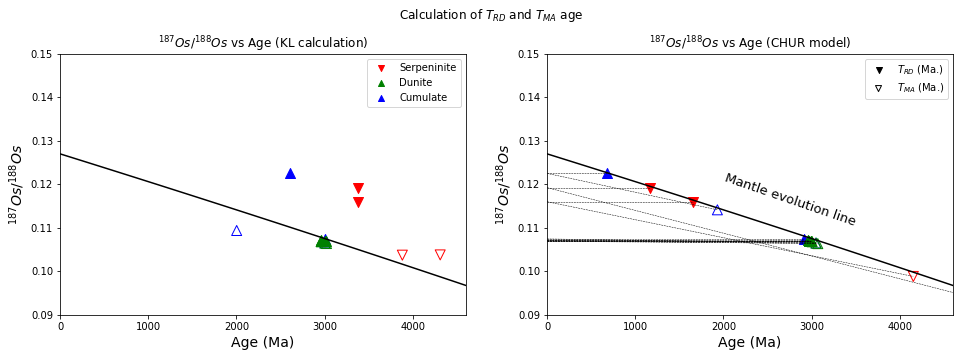

In [128]:
plt.figure(figsize=[16,5])

sym = {"cum.":["b","^"],
       "dun.":["g","^"],
       "sep.":["r","v"]
      }

plt.subplot(121)
#plt.plot(t,mantle_curve(t,system="DM"),"k-")
plt.plot(t,mantle_curve(t,system="CHUR"),"k-")
#plt.scatter(df["TRD (Ma)"],df["187Os/188Os"],label="$T_{RD}$")
#plt.scatter(df["TMA (Ma)"],df["187Os/188Osi"],c="g",label="$T_{MA}$")
for i in range(0,len(df)):
    plt.scatter(df["TRD (Ma)"][i],df["187Os/188Os"][i], s = 100,
                c=sym[df["meta.grade"][i]][0],marker=sym[df["meta.grade"][i]][1])
    plt.scatter(df["TMA (Ma)"][i],df["187Os/188Osi"][i], s = 100, facecolors="none",
                edgecolor=sym[df["meta.grade"][i]][0],marker=sym[df["meta.grade"][i]][1])
plt.scatter([],[],marker="v",c="r",label="Serpeninite")
plt.scatter([],[],marker="^",c="g",label="Dunite")
plt.scatter([],[],marker="^",c="b",label="Cumulate")
plt.xlim(0,4600)
plt.ylim(0.09,0.15)
plt.xlabel("Age (Ma)",fontsize=14)
plt.ylabel(r"$^{187}Os/^{188}Os$",fontsize=14)
plt.title(r"$^{187}Os/^{188}Os$ vs Age (KL calculation)")
plt.legend()

plt.subplot(122)
#plt.plot(t,mantle_curve(t,system="DM"),"k-",label="DM curve")
plt.plot(t,mantle_curve(t,system="CHUR"),"k-")
plt.text(2000, 0.1105,"Mantle evolution line",rotation=-19,fontsize=13)
#plt.scatter(df["TRD_CHUR"],df["187Os/188Os"])
i0_CHUR = I0(df["187Os/188Os"],df["187Re/188Os"],df["TMA_CHUR"],lda)
df["187Os/188Osi_CHUR"] = [round(a,5) for a in i0_CHUR]
#plt.scatter(df["TMA_CHUR"],i0_CHUR,c="g")
for i in range(0,len(df)):
    plt.scatter(df["TRD_CHUR"][i],df["187Os/188Os"][i], s = 100,
                c=sym[df["meta.grade"][i]][0],marker=sym[df["meta.grade"][i]][1])
    plt.scatter(df["TMA_CHUR"][i],i0_CHUR[i], s = 100, facecolors="none",
                edgecolor=sym[df["meta.grade"][i]][0],marker=sym[df["meta.grade"][i]][1])
    plt.plot([0,df["TRD_CHUR"][i]],[df["187Os/188Os"][i],df["187Os/188Os"][i]],"k--",linewidth=0.5)
    plt.plot([0,df["TMA_CHUR"][i]],[df["187Os/188Os"][i],i0_CHUR[i]],"k--",linewidth=0.5)

plt.xlim(0,4600)
plt.ylim(0.09,0.15)
plt.xlabel("Age (Ma)",fontsize=14)
plt.ylabel(r"$^{187}Os/^{188}Os$",fontsize=14)
plt.title(r"$^{187}Os/^{188}Os$ vs Age (CHUR model)")
plt.scatter([],[],marker="v",c="k",label=r"$T_{RD}$ (Ma.)")
plt.scatter([],[],marker="v",facecolor="none",edgecolor="k",label=r"$T_{MA}$ (Ma.)")
plt.legend()

plt.suptitle("Calculation of $T_{RD}$ and $T_{MA}$ age ")
plt.subplots_adjust(top=0.85)
plt.savefig("re_os.svg",bbox_inches="tight",dpi=300)
plt.show()

In [129]:
df.iloc[:,[0,1,2,4,8,10,12]]#.to_csv("re_os_kl.csv")

,Sample No.,Rock type,187Re/188Os,187Os/188Os,187Os/188Osi,TRD (Ma),TMA (Ma)
0,OL1633,Ultramafic,0.256200,0.12251,0.10938,2611,2002
1,OL1637,Ultramafic,0.018106,0.10744,0.10651,3002,3002
2,OL1638,Ultramafic,0.012980,0.10704,0.10638,3020,3020
3,OL1639,Ultramafic,0.007218,0.10687,0.10650,3003,3003
4,OL1639-1,Ultramafic,0.006878,0.10715,0.10680,2962,2962
5,OL1640,Ultramafic,0.004814,0.10707,0.10682,2960,2959
6,OL1668,Ultramafic,0.302000,0.11924,0.10377,3373,4309
7,OL1669,Ultramafic,0.239900,0.11600,0.10371,3380,3880


In [130]:
df.iloc[:,[0,1,2,4,19,14,15]]#.to_csv("re_os.csv")

,Sample No.,Rock type,187Re/188Os,187Os/188Os,187Os/188Osi_CHUR,TRD_DM,TMA_DM
0,OL1633,Ultramafic,0.256200,0.12251,0.11413,792,2002
1,OL1637,Ultramafic,0.018106,0.10744,0.10650,2876,3002
2,OL1638,Ultramafic,0.012980,0.10704,0.10636,2930,3021
3,OL1639,Ultramafic,0.007218,0.10687,0.10649,2953,3003
4,OL1639-1,Ultramafic,0.006878,0.10715,0.10680,2915,2962
5,OL1640,Ultramafic,0.004814,0.10707,0.10682,2926,2959
6,OL1668,Ultramafic,0.302000,0.11924,0.09363,1250,4310
7,OL1669,Ultramafic,0.239900,0.11600,0.09882,1701,3882


### Comparison 1

* $^{187}Re/^{188}Os = 0.3935$

* $^{187}Os/^{188}Os = 0.127$

* $λ=1.67E-11$

Szilas, K., Van Hinsberg, V.J., Creaser, R.A. and Kisters, A.F., 2014. The geochemical composition of serpentinites in the Mesoarchaean Tartoq Group, SW Greenland: Harzburgitic cumulates or melt-modified mantle?. Lithos, 198, pp.103-116.

In [96]:
df_comp = pd.read_csv("os_re_compare.csv",encoding="iso-8859-1")
#df_comp.head()

In [97]:
Os187_Os188c = 0.127
Re187_Os188c = 0.3935
lda = 1.67e-11

In [98]:
df_comp["TRD_re"] = 1/lda*(np.log((Os187_Os188c-df_comp["187Os/188Os"].values)/Re187_Os188c+1))/10**6
df_comp["TRD_re"] = df_comp["TRD_re"].round()
df_comp["TMA_re"] = 1/lda*(np.log((Os187_Os188c-df_comp["187Os/188Os"].values)/(Re187_Os188c-df_comp["187Re/188Os"])+1))/10**6
df_comp["TMA_re"] = df_comp["TMA_re"].round()
df_comp.iloc[:,[0,1,2,3,4,5,6,7,8,11,9,12,10,13]]

,Sample,Re (ppb),± 2?,Total Os (ppt),± 2?.1,187Re/188Os,± 2?.2,187Os/188Os,± 2?.3,?Os,TRD,TRD_re,TMA,TMA_re
0,510767,0.051,0.001,4520,5,0.0547,0.0013,0.1117,0.0004,-12.0,2287,2284.0,2649,2645.0
1,510784,0.026,0.001,1309,1,0.0937,0.0043,0.1083,0.0004,-14.8,2794,2780.0,3640,3623.0
2,510793,0.014,0.001,1035,1,0.0660,0.0055,0.1073,0.0005,-15.5,2935,2925.0,3509,3498.0


### Comparison 2

TRD and TMA are calculated relative to the primitive upper mantle (PUM): 
187Re/188Os= 0.4353; 187Os/188Os= 0.1296; λ = 1.6660E−11

Guo, P., Xu, W.L., Wang, C.G., Wang, F., Ge, W.C., Sorokin, A.A. and Wang, Z.W., 2017. Age and evolution of the lithospheric mantle beneath the Khanka Massif: geochemical and Re–Os isotopic evidence from Sviyagino mantle xenoliths. Lithos, 282, pp.326-338.

In [99]:
df_comp2 = pd.read_csv("os_re_compare2.csv")
Os187_Os188c2 = 0.1296
Re187_Os188c2 = 0.4353
lda = 1.666e-11
#df_comp2.head()

In [100]:
df_comp2["TRD_re"] = 1/lda*(np.log((Os187_Os188c2-df_comp2["187Os/188Os"].values)/Re187_Os188c2+1))/10**9
df_comp2["TRD_re"] = df_comp2["TRD_re"].round(2)
df_comp2["TMA_re"] = 1/lda*(np.log((Os187_Os188c2-df_comp2["187Os/188Os"].values)/(Re187_Os188c2-df_comp2["187Re/188Os"])+1))/10**9
df_comp2["TMA_re"] = df_comp2["TMA_re"].round(2)
df_comp2.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,12,11,13]]

,Sample,Os(ppb),Ir (ppb),Ru (ppb),Pt (ppb),Pd (ppb),Re(ppb),187Re/188Os,187Os/188Os,2SD%,TRD(Ga),TRD_re,TMA(Ga),TMA_re
0,RF42-5,1.98,2.56,5.31,6.58,3.34,0.18,0.45,0.12924,0.000032,-0.25,0.05,0.05,-1.49
1,RF42-6,2.50,2.89,6.01,4.19,1.89,0.03,0.06,0.11458,0.000010,1.91,2.04,2.09,2.36
2,RF42-7,1.94,2.82,5.20,5.70,2.82,0.08,0.20,0.12511,0.000014,0.37,0.62,0.63,1.13
3,RF42-8,1.84,3.22,6.03,4.75,2.36,0.08,0.21,0.12411,0.000013,0.52,0.75,0.77,1.45
4,RF42-9,1.57,3.02,6.09,5.70,2.83,0.08,0.26,0.12477,0.000021,0.42,0.66,0.68,1.63
5,RF42-10,2.13,3.75,7.07,5.77,2.51,0.34,0.77,0.12697,0.000004,0.09,0.36,0.37,-0.47
6,RF42-11,2.01,2.94,5.67,5.74,2.98,0.09,0.22,0.12634,0.000008,0.19,0.45,0.46,0.90


#### Comparison 3

TRD and TMA are calculated relative to the primitive upper mantle (PUM): 187Re/188Os= 0.4353; 187Os/188Os= 0.1296; λ = 1.6660E−11

Schilling, M.E., Carlson, R.W., Tassara, A., Conceição, R.V., Bertotto, G.W., Vásquez, M., Muñoz, D., Jalowitzki, T., Gervasoni, F. and Morata, D., 2017. The origin of Patagonia revealed by Re-Os systematics of mantle xenoliths. Precambrian Research, 294, pp.15-32.


In [101]:
df_comp3 = pd.read_csv("os_re_compare3.csv",encoding="iso-8859-1")
Os187_Os188c3 = 0.1296
Re187_Os188c3 = 0.4353
lda = 1.666e-11
#df_comp3.head()

In [102]:
df_comp3["TRD_re"] = 1/lda*(np.log((Os187_Os188c3-df_comp3["187Os/188Os"].values)/Re187_Os188c3+1))/10**9
df_comp3["TRD_re"] = df_comp3["TRD_re"].round(2)
df_comp3["TMA_re"] = 1/lda*(np.log((Os187_Os188c3-df_comp3["187Os/188Os"].values)/(Re187_Os188c3-df_comp3["187Re/188Os"])+1))/10**9
df_comp3["TMA_re"] = df_comp3["TMA_re"].round(2)
df_comp3.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,13,12,14]]

,Sample,Os,Ir,Ru,Pt,Pd,Re,187Re/188Os,187Os/188Os,187Os/188Os(i),_Os(i),TRD (Ga),TRD_re,TMA (Ga),TMA_re
0,PM25-8,1.32,1.64,3.03,6.58,2.01,0.05,0.1594,0.12018,0.12002,_7.1,1.31,1.29,2.05,2.02
1,PM25-10,1.78,4.39,5.93,5.63,0.78,0.02,0.0585,0.11718,0.11712,_9.3,1.7,1.69,1.96,1.95
2,PM26-4,2.69,3.60,6.02,8.48,5.06,0.29,0.9851,0.12438,0.12370,_4.3,0.81,0.72,Future,-0.57
3,PM26-5,2.19,3.60,5.04,7.26,4.87,0.08,0.2669,0.12337,0.12319,_4.7,0.88,0.85,2.24,2.18
4,PM24-21,2.67,3.38,6.89,8.02,4.89,0.30,1.0069,0.12381,0.12361,_4.6,0.82,0.79,Future,-0.61
5,PM24-41,1.65,1.75,3.71,4.89,2.64,0.08,0.2710,0.12394,0.12389,_4.3,0.78,0.78,2.05,2.03
6,PM27A-9,3.34,2.73,10.20,3.29,0.28,0.09,0.2965,0.11469,0.11469,_11.5,2.02,2.02,6.13,6.12
7,PM27B-1B,1.52,1.74,2.47,1.89,0.20,0.06,0.1963,0.11628,0.11627,_10.3,1.81,1.81,3.26,3.26
8,PM27B-2,2.18,2.75,3.69,3.27,0.34,0.04,0.1452,0.11389,0.11389,_12.1,2.13,2.13,3.17,3.17
9,PM27B-12B,1.56,1.51,2.37,2.11,0.58,0.07,0.2185,0.11791,0.11790,_9.0,1.59,1.59,3.16,3.15


#### Comparison 4

TRD and TMA ages (Ga) are calculated by using 187Re decay constant λRe= 1.666 × 10−11 year−1 relative to the evolution of average chondrite with initial 187Os/188Os = 0.09531 at 4.558 Ga, and 187Re/188Os = 0.40186 (Smoliar et al., 1996, Shirey and Walker, 1998). Initial 187Os/188Os ratios are recalculated by using age values of Sm-Nd isochrons, which are 3.362 Ga for lithospheric mantle suite including Cape Uivak layered body, and 3.782 Ga for metakomatiite suite, respectively (Morino et al., 2017).

Ishikawa, A., Suzuki, K., Collerson, K.D., Liu, J., Pearson, D.G. and Komiya, T., 2017. Rhenium-osmium isotopes and highly siderophile elements in ultramafic rocks from the Eoarchean Saglek Block, northern Labrador, Canada: implications for Archean mantle evolution. Geochimica et Cosmochimica Acta, 216, pp.286-311.

In [103]:
df_comp4 = pd.read_csv("os_re_compare4.csv",encoding="iso-8859-1")
df_comp4 = df_comp4.dropna()
Os187_Os188ic4 = 0.09531
Os187_Os188c4 = 0.1270 
Re187_Os188c4 = 0.40186
lda = 1.666e-11
#df_comp4.head()

In [104]:
df_comp4["TRD_re"] = 1/lda*(np.log((Os187_Os188c4-df_comp4["187Os/188Os"].values)/Re187_Os188c4+1))/10**9
df_comp4["TRD_re"] = df_comp4["TRD_re"].round(2)
df_comp4["TMA_re"] = 1/lda*(np.log((Os187_Os188c4-df_comp4["187Os/188Os"].values)/(Re187_Os188c4-df_comp4["187Re/188Os"])+1))/10**9
df_comp4["TMA_re"] = df_comp4["TMA_re"].round(2)
df_comp4.iloc[:,[0,1,6,7,8,9,13,10,14]].reset_index(drop=True)


,Sample,Os (ng/g),Re (ng/g),187Re/188Os,187Os/188Os,TRD(Ga),TRD_re,TMa(Ga),TMA_re
0,KC87-104D,4.440,0.0078,0.0084,0.10557,3.15,3.12,3.21,3.18
1,KC87-104E,4.360,0.0145,0.0160,0.10534,3.18,3.15,3.31,3.28
2,KC91-21A,2.570,0.0471,0.0881,0.10544,3.17,3.14,4.01,3.99
3,KC91-21B,2.230,0.0236,0.0507,0.10412,3.35,3.32,3.81,3.79
4,dupl.,2.500,0.0175,0.0336,0.10453,3.29,3.27,3.58,3.56
5,KC91-52A,3.570,0.0042,0.0057,0.10786,2.83,2.79,2.87,2.83
6,KC91-52B,3.860,0.0096,0.0120,0.10558,3.15,3.12,3.24,3.21
7,KC91-52D,4.150,0.0060,0.0069,0.10529,3.19,3.16,3.24,3.21
8,KC87-114G,4.080,0.0073,0.0086,0.10481,3.25,3.23,3.32,3.29
9,KC87-114I,4.310,0.0056,0.0062,0.10458,3.29,3.26,3.34,3.31
